In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.iloc[488]

,488
customerID,4472-LVYGI
gender,Female
SeniorCitizen,0
Partner,Yes
Dependents,Yes
tenure,0
PhoneService,No
MultipleLines,No phone service
InternetService,DSL
OnlineSecurity,Yes


In [ ]:
df['TotalCharges'] =pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O'and feature not in ['customerID', 'Churn']]
categorical_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

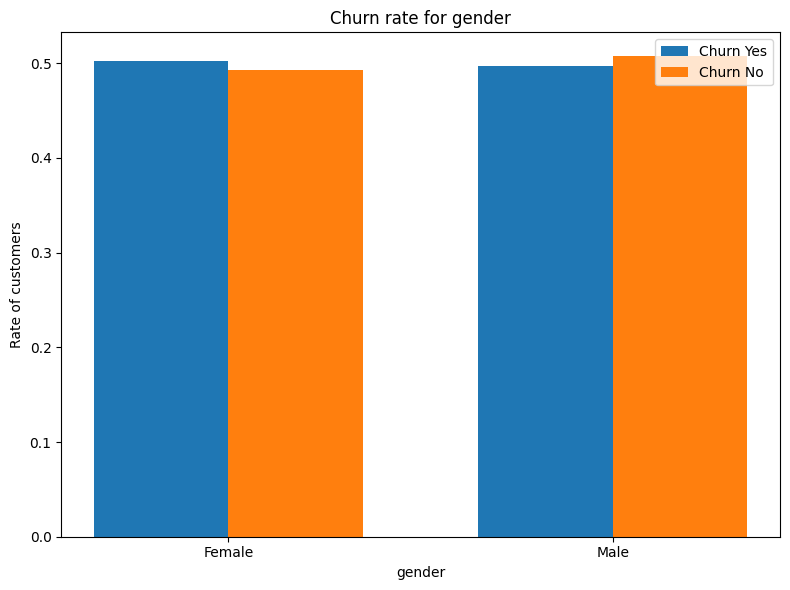

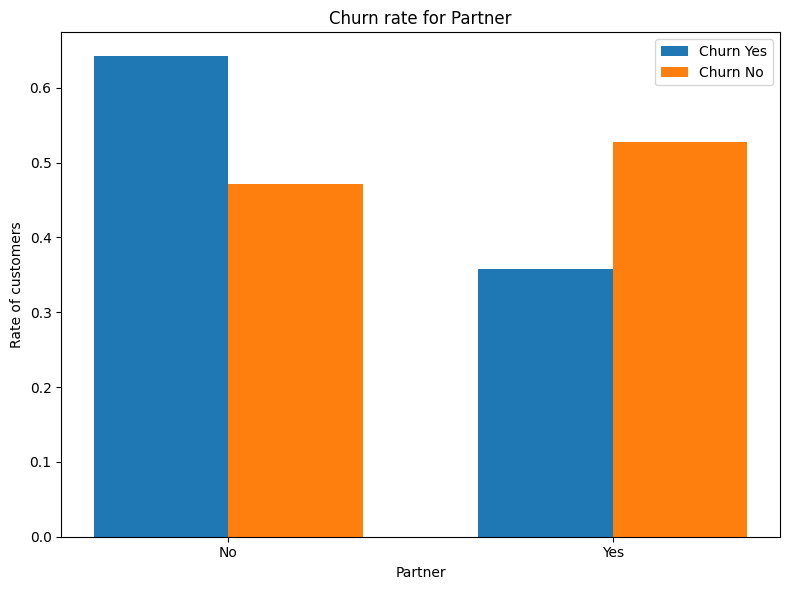

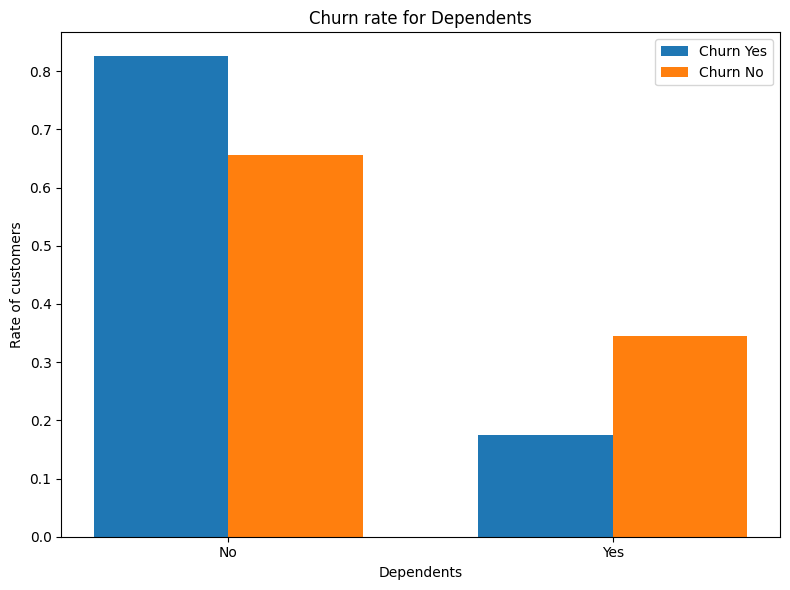

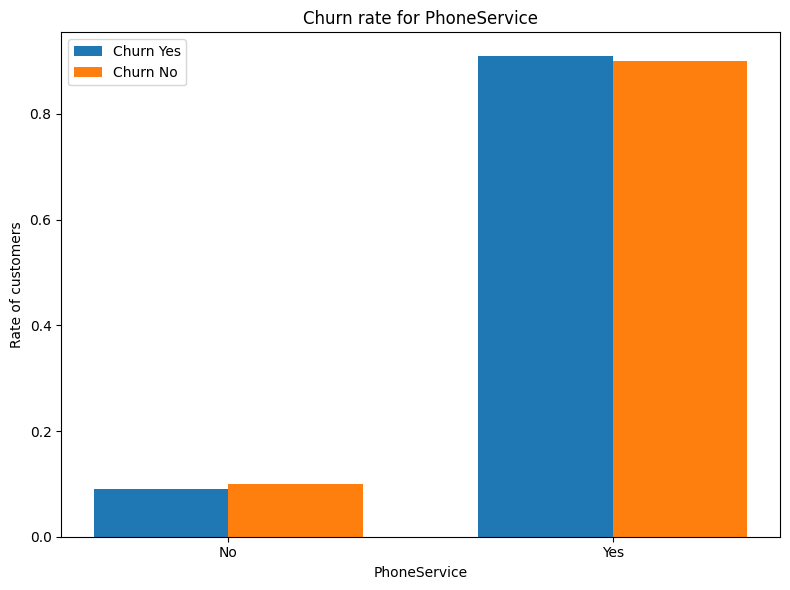

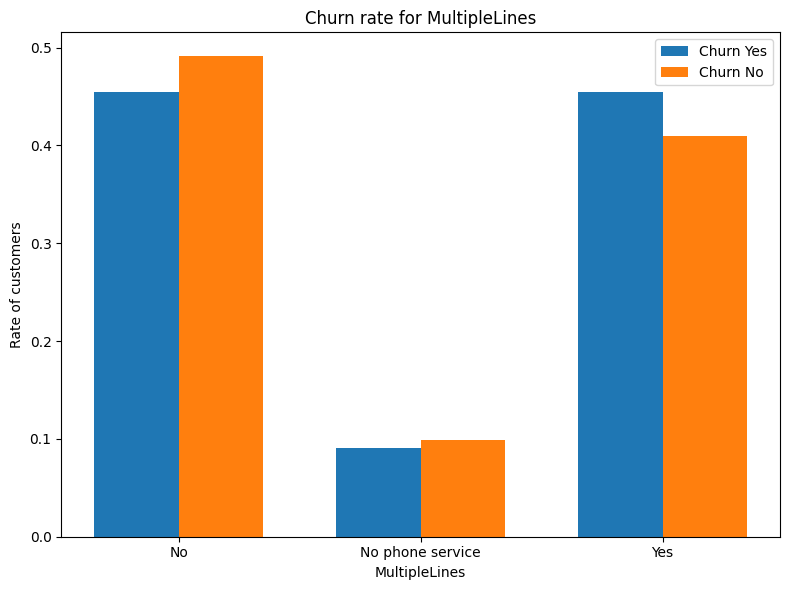

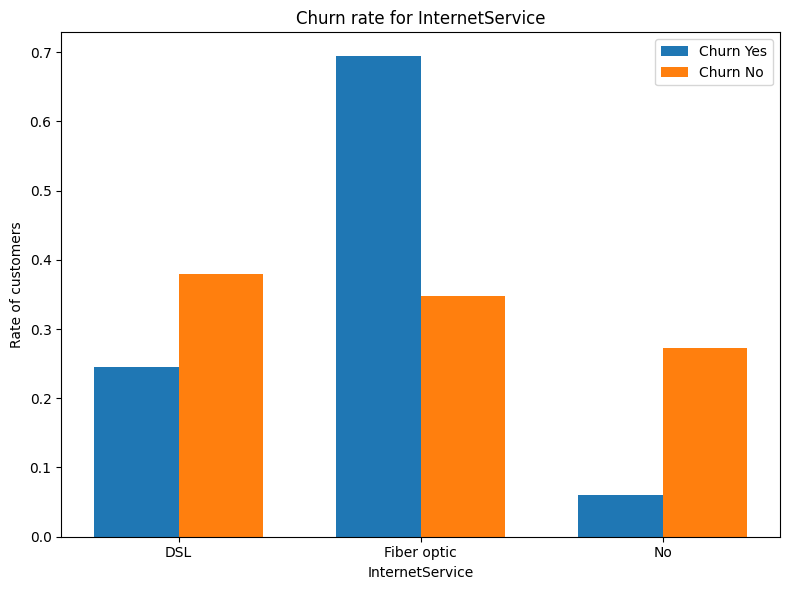

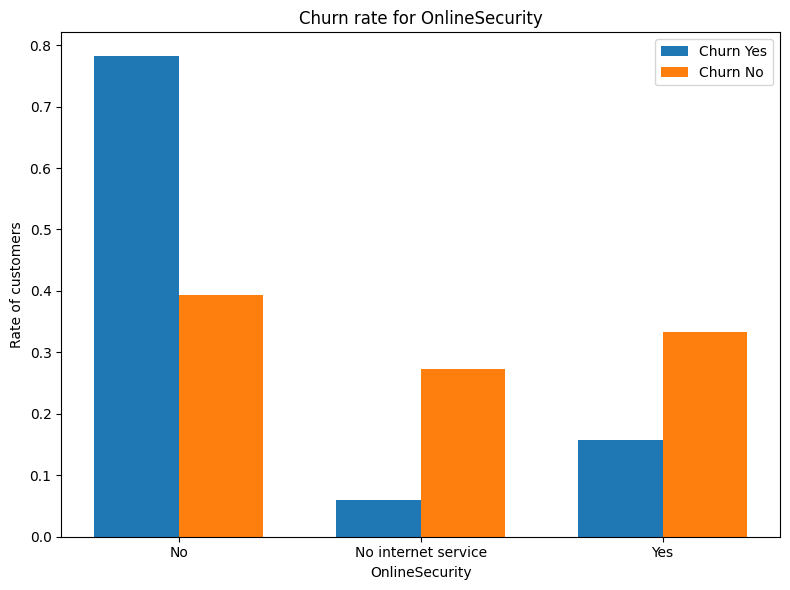

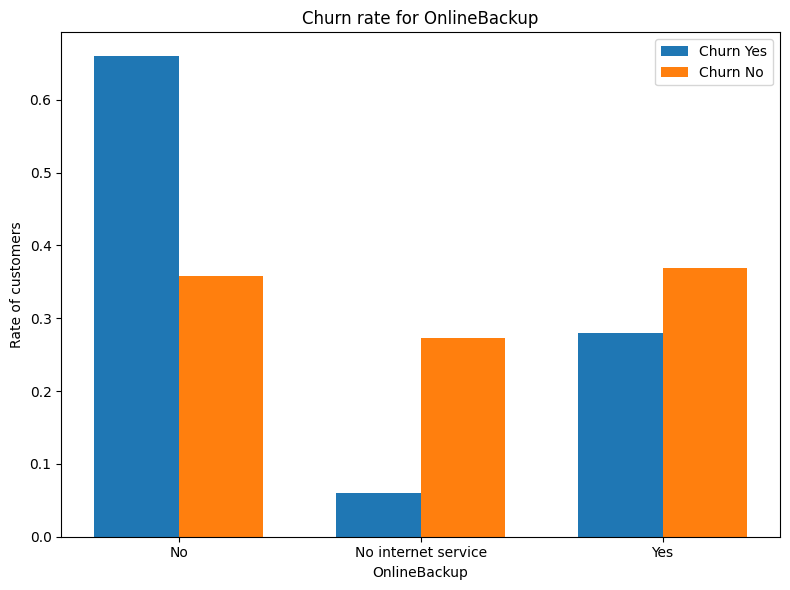

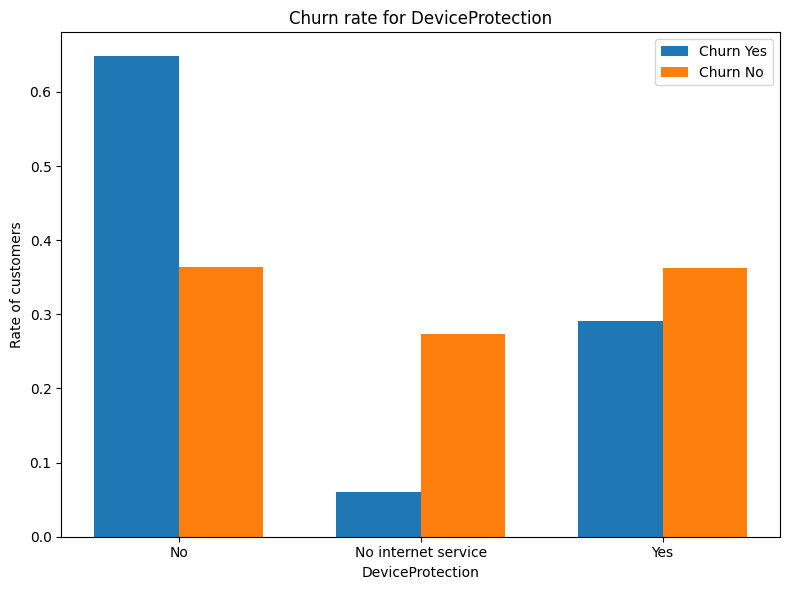

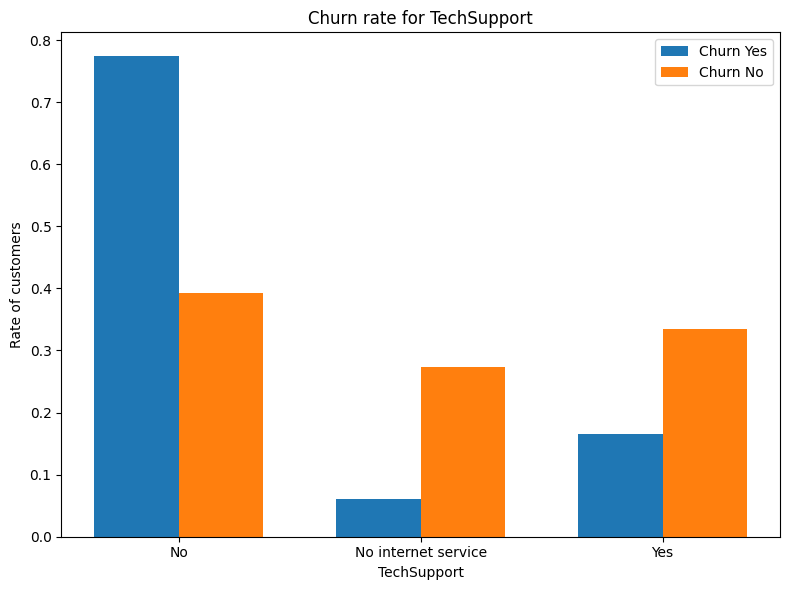

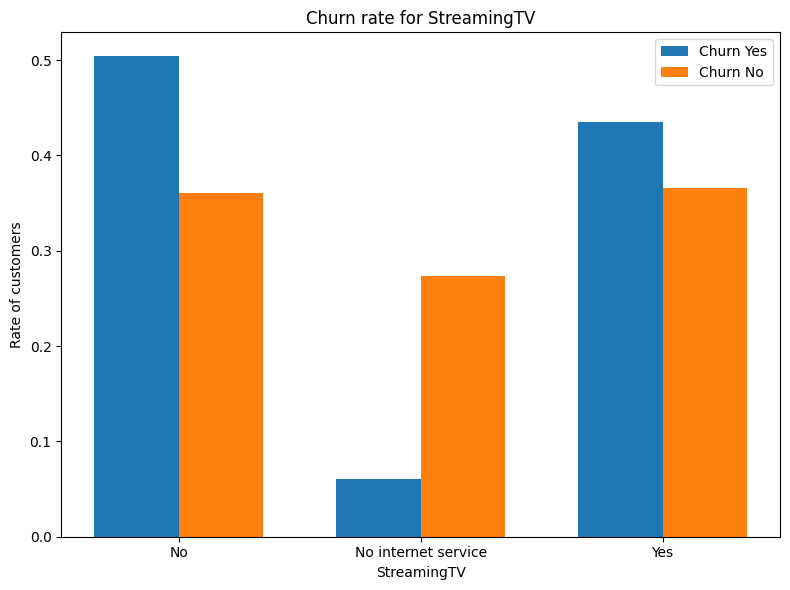

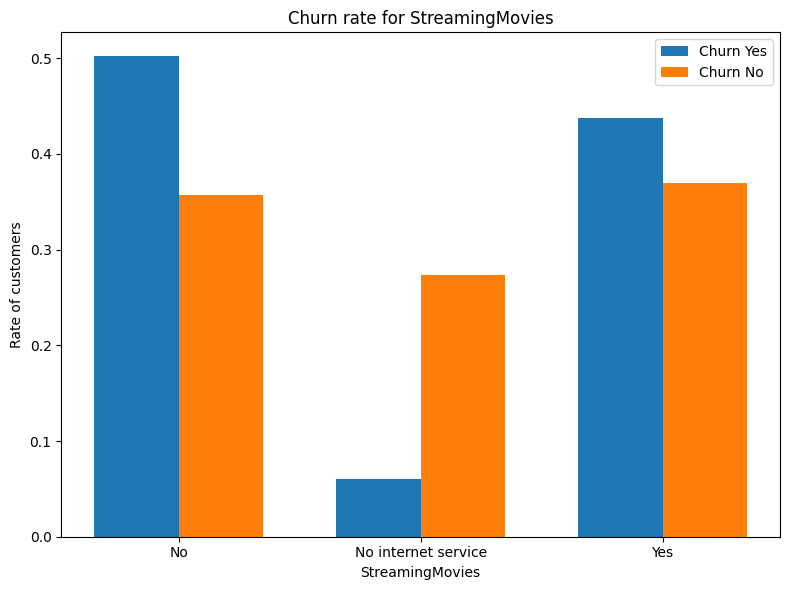

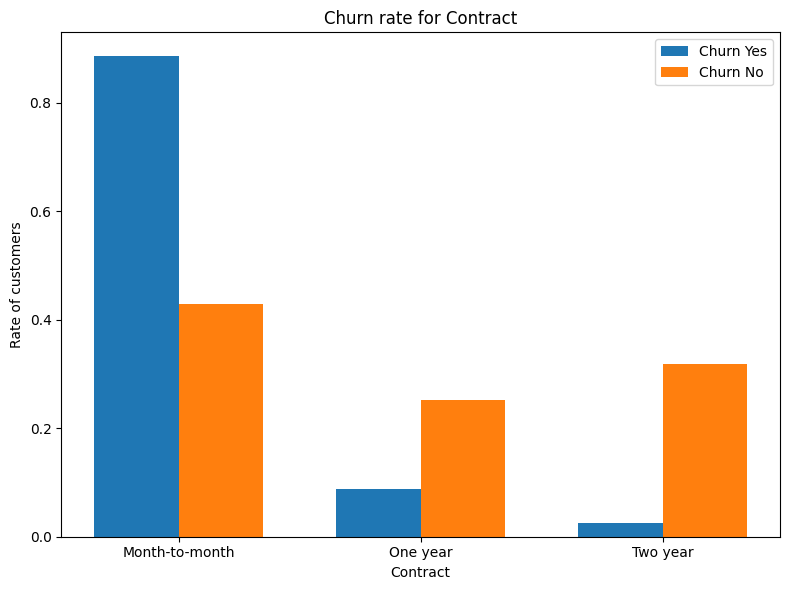

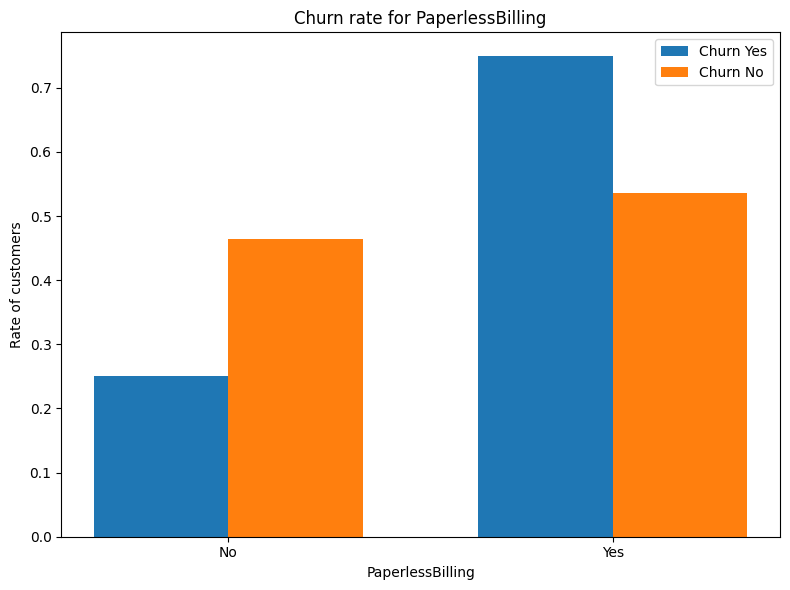

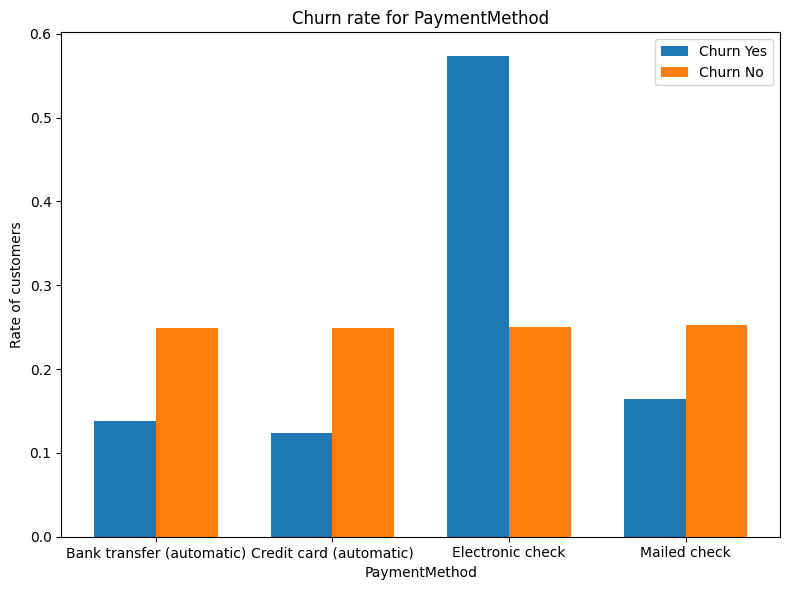

In [ ]:
#bar graph churn rate
for feature in categorical_features:
    dataset = df.copy()
    plt.figure(figsize=(8, 6))
    churn_rate_yes = dataset.groupby(feature)['Churn'].apply(lambda x: (x == 'Yes').sum() / dataset['Churn'].eq('Yes').sum())
    churn_rate_no = dataset.groupby(feature)['Churn'].apply(lambda x: (x == 'No').sum() / dataset['Churn'].eq('No').sum())
    width = 0.35
    x = np.arange(len(churn_rate_yes.index))
    plt.bar(x - width/2, churn_rate_yes.values, width, label='Churn Yes')
    plt.bar(x + width/2, churn_rate_no.values, width, label='Churn No')
    plt.xlabel(feature)
    plt.ylabel('Rate of customers')
    plt.title(f"Churn rate for {feature}")
    plt.xticks(x, churn_rate_yes.index)
    plt.tight_layout()
    plt.legend()
    plt.show()

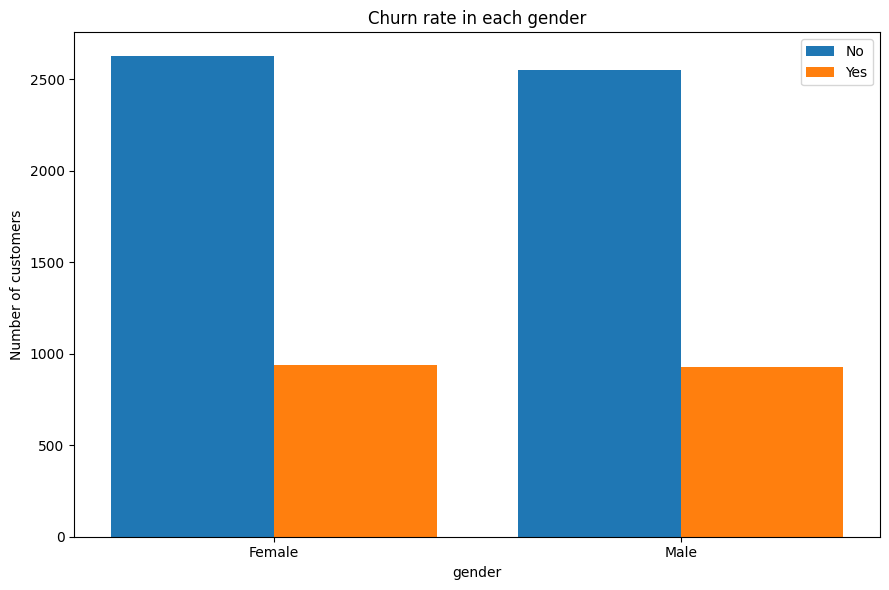

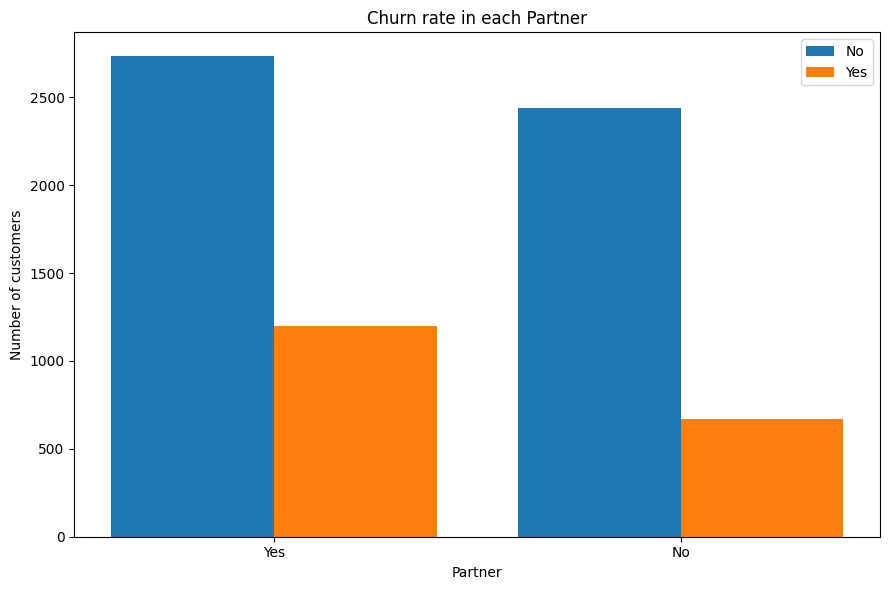

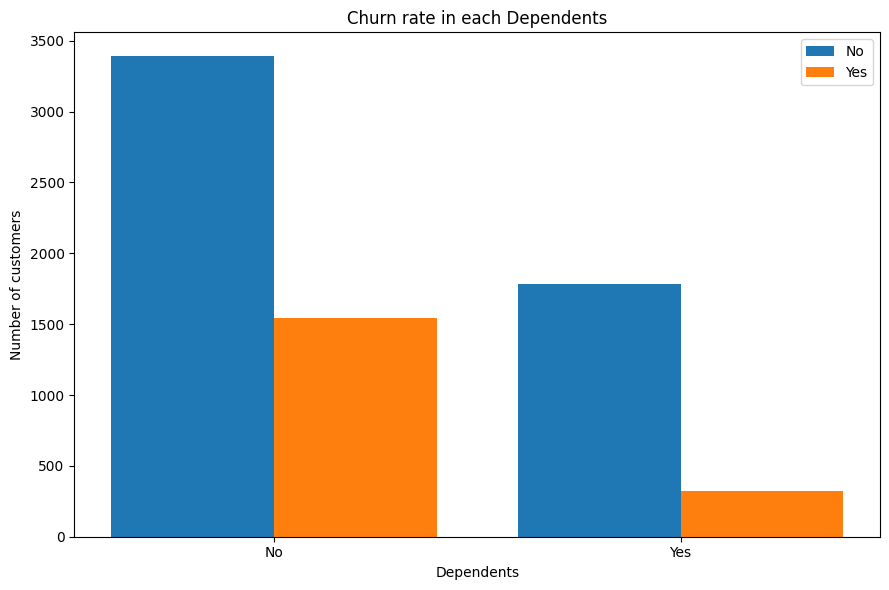

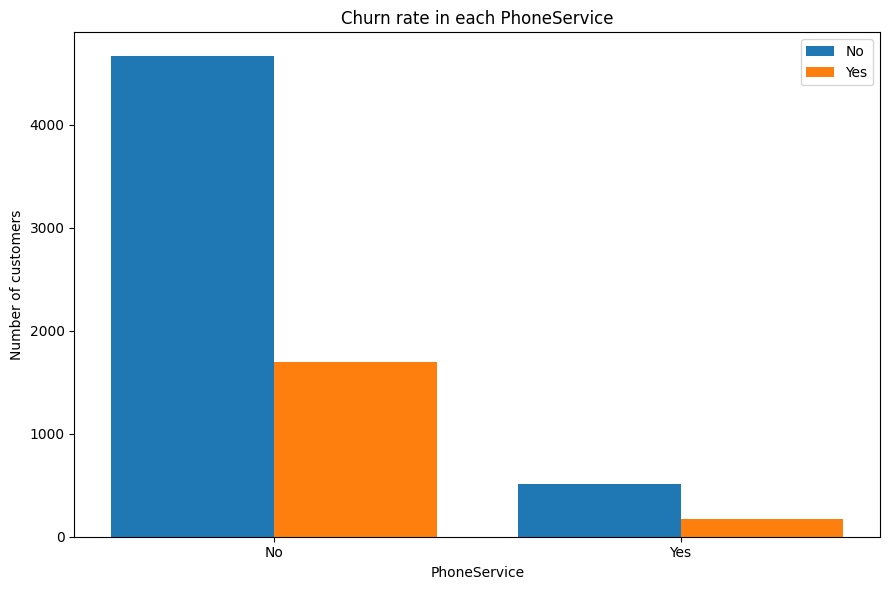

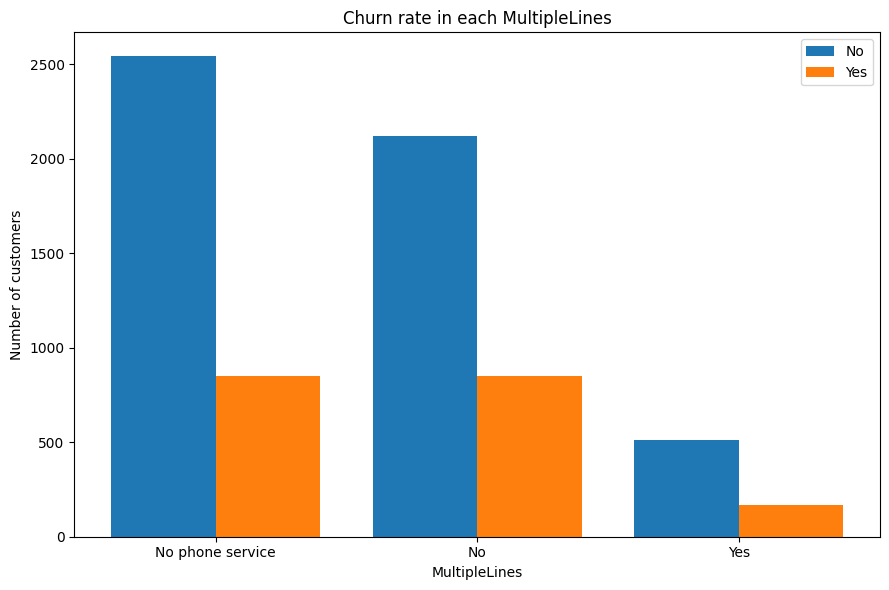

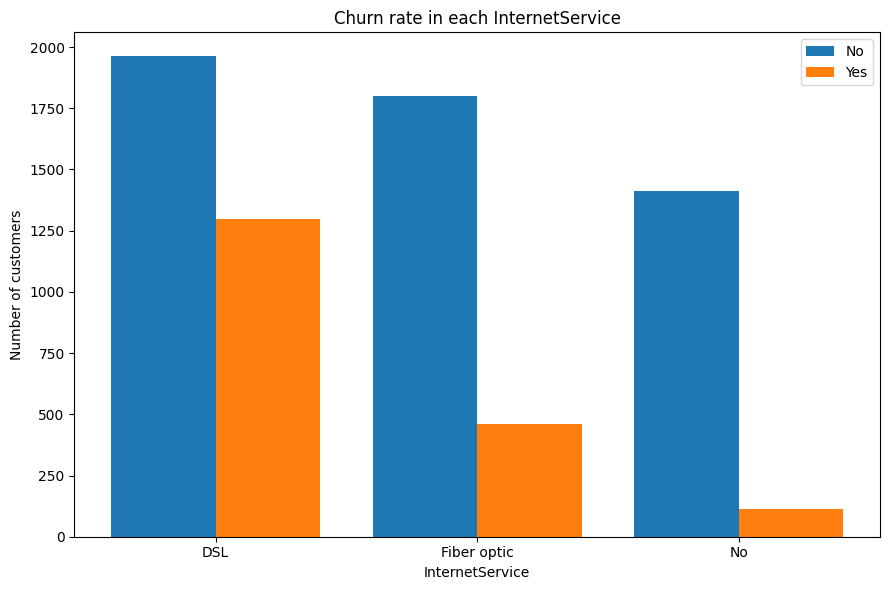

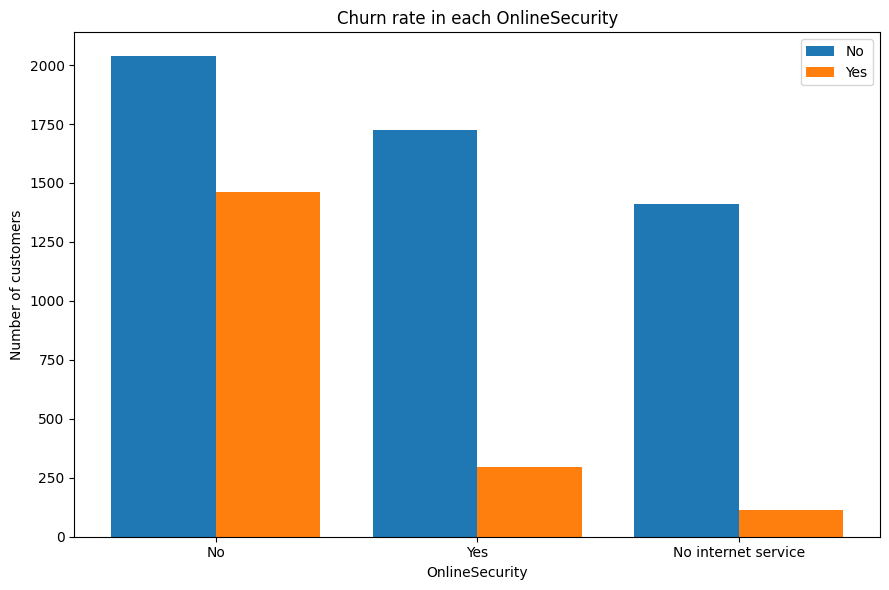

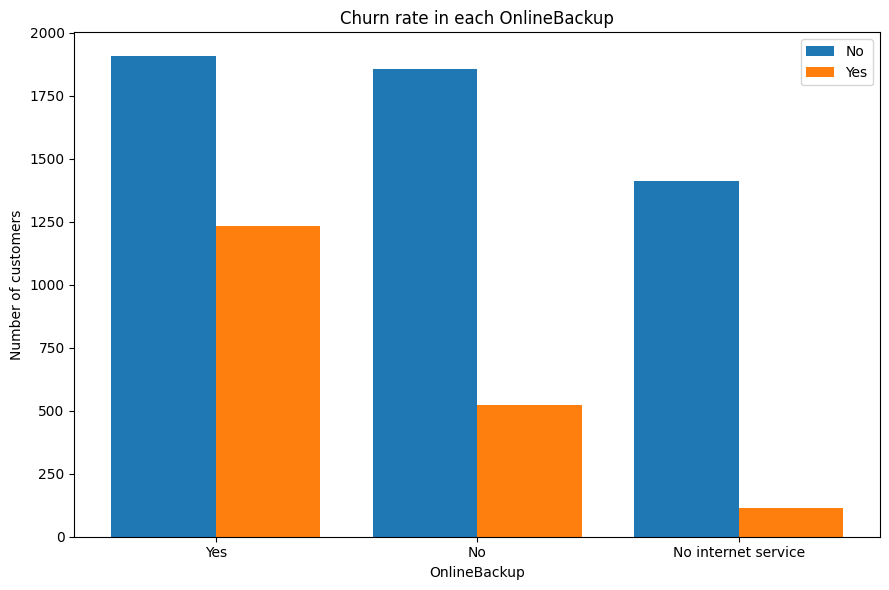

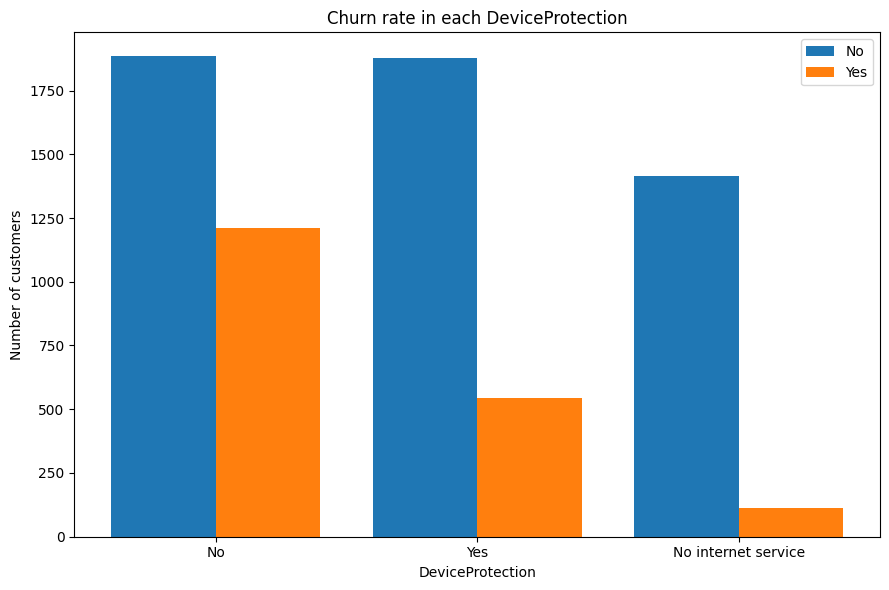

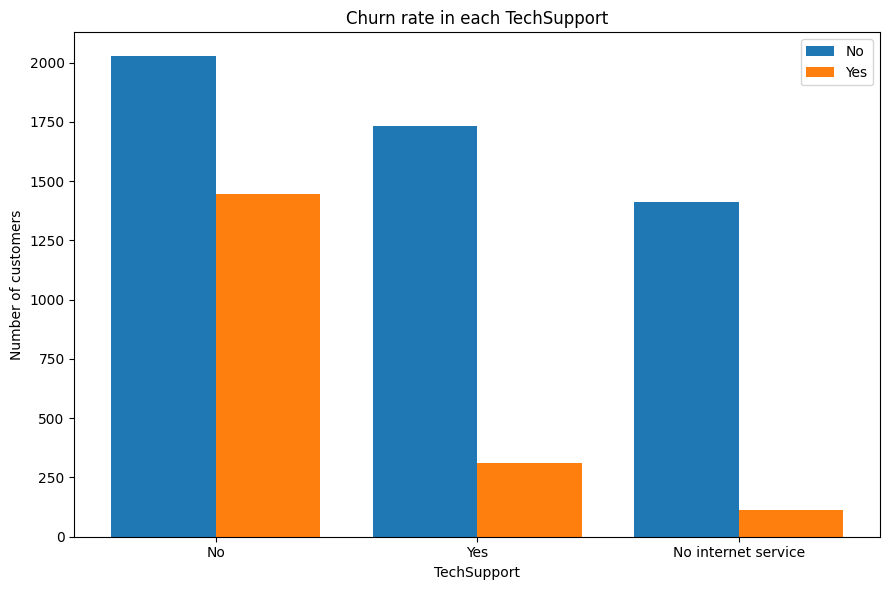

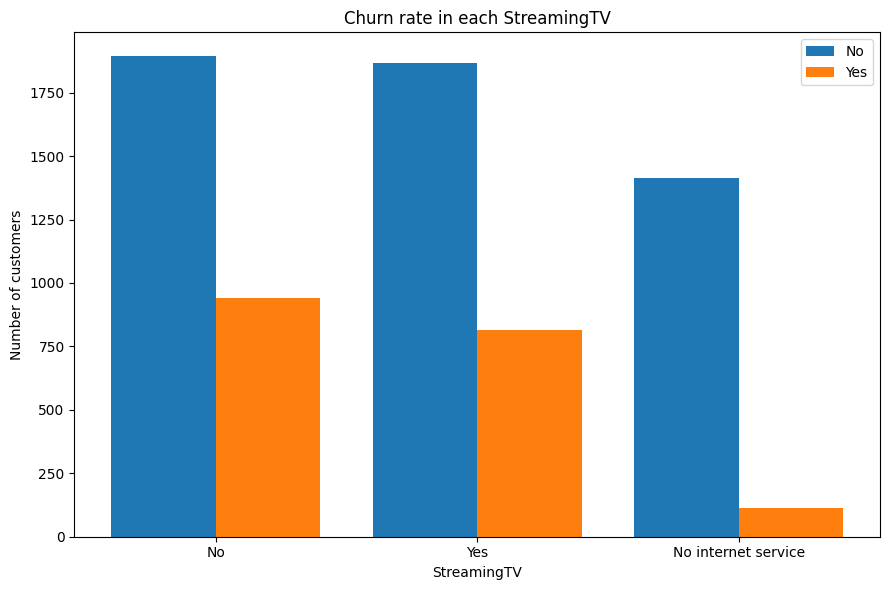

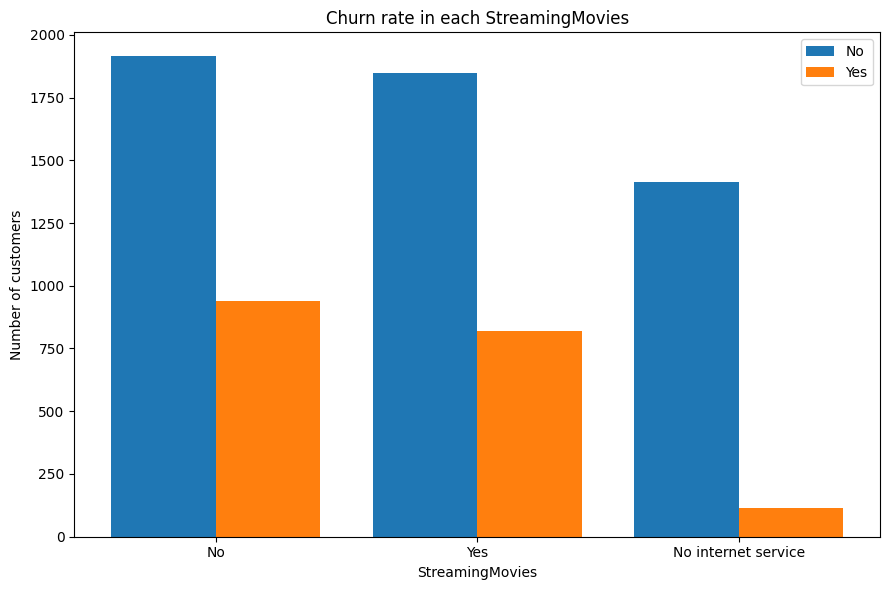

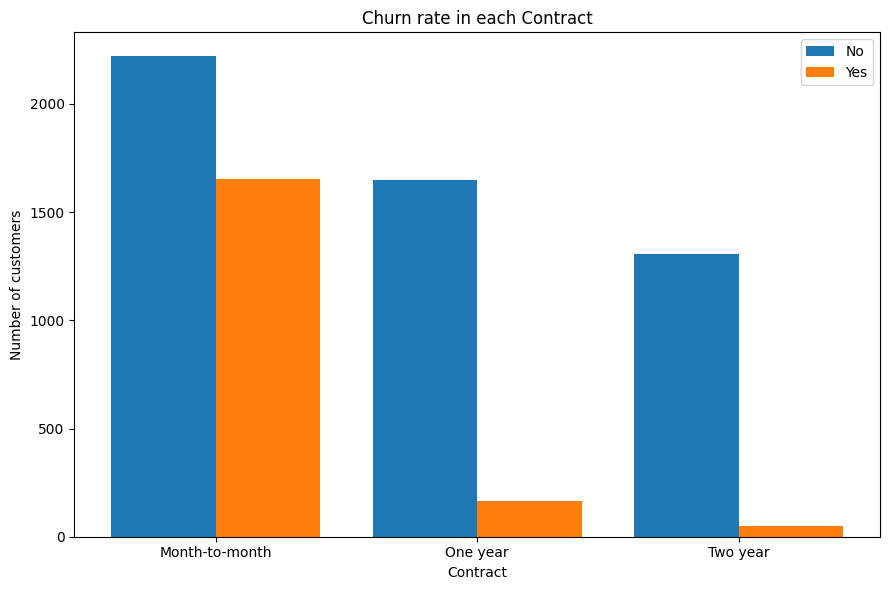

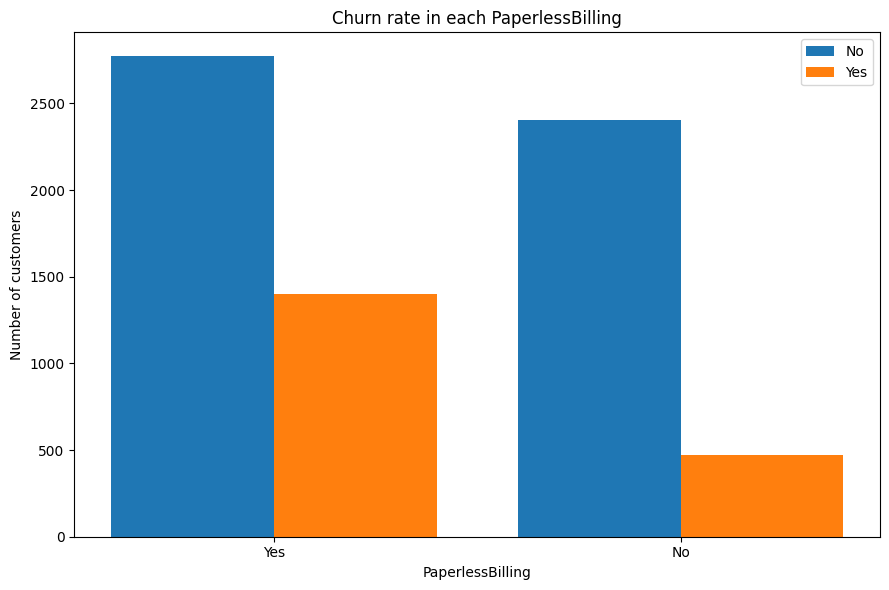

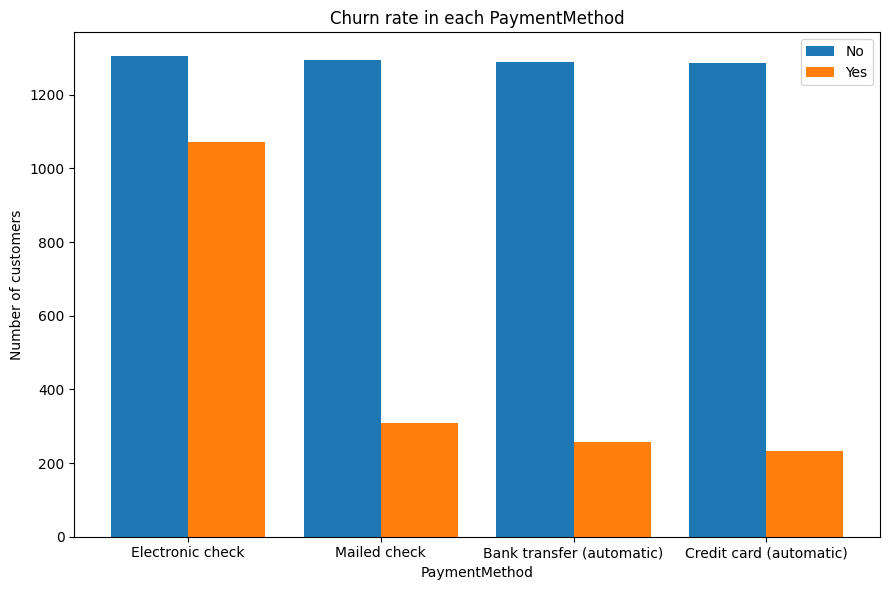

In [ ]:
#for feature in categorical_features:
#   dataset = df.copy()
#   X_axis = np.arange(len(df[feature].unique()))
#   plt.figure(figsize=(9, 6))
#   plt.bar(X_axis - 0.2, dataset.loc[dataset['Churn'] == 'No', feature].value_counts(), 0.4, label = 'No')
#   plt.bar(X_axis + 0.2, dataset.loc[dataset['Churn'] == 'Yes', feature].value_counts(), 0.4, label = 'Yes')


 #  plt.xticks(X_axis, df[feature].unique())
 #  plt.xlabel(feature)
 #  plt.ylabel('Number of customers')
  # plt.title(f"Churn rate in each {feature}")
  # plt.tight_layout()
  # plt.legend()
  # plt.show()

In [ ]:
continuous_features = ['MonthlyCharges', 'TotalCharges']
continuous_features

['MonthlyCharges', 'TotalCharges']

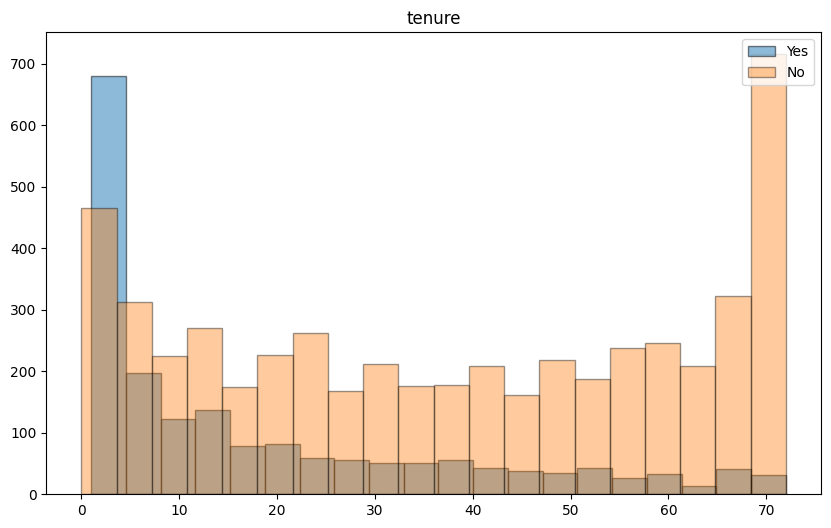

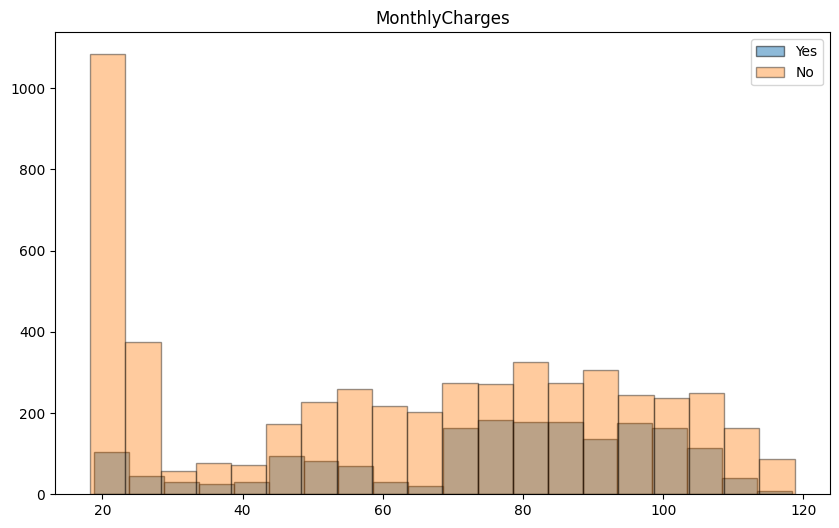

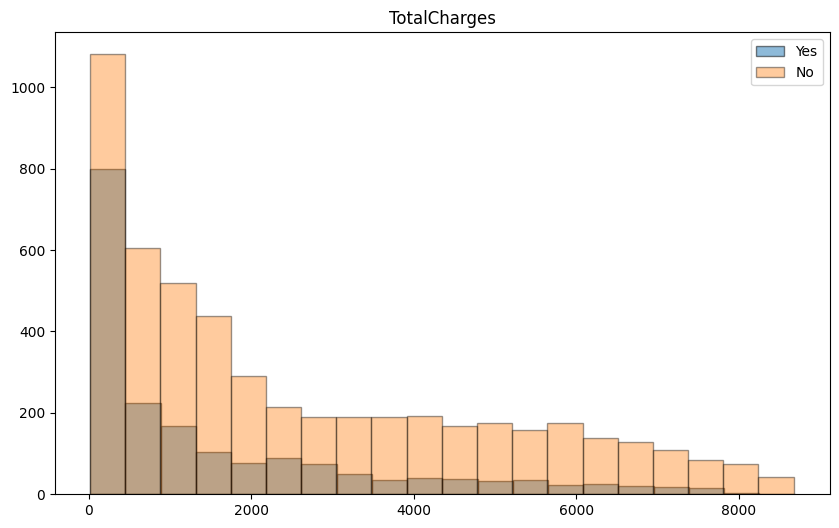

In [ ]:
#for feature in continuous_features:
#    dataset = df.copy()
#    plt.figure(figsize=(10, 6))
#    plt.hist(dataset[dataset['Churn'] == 'Yes'][feature], alpha=0.5, label='Yes', bins =20, edgecolor='black')
#    plt.hist(df[dataset['Churn'] == 'No'][feature], alpha=0.4, label='No', bins = 20, edgecolor='black')
#    plt.legend(loc='upper right')
#    plt.title(feature)
#    plt.show()

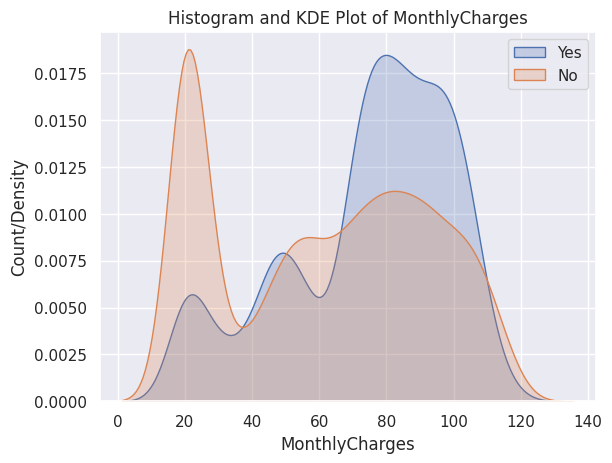

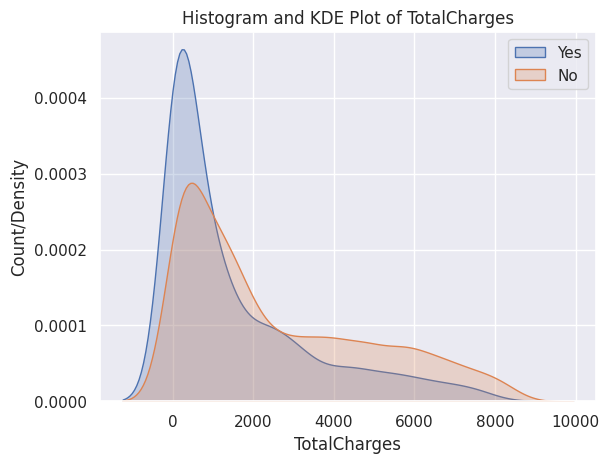

In [ ]:
for feature in continuous_features:  #visualizing the underlying density of the data in a smooth and continuous way.
    dataset = df.copy()
    sns.set()
    sns.kdeplot(data=dataset[dataset['Churn'] == 'Yes'], x=feature, fill=True, cmap='viridis', label='Yes')
    sns.kdeplot(data=dataset[dataset['Churn'] == 'No'], x=feature, fill=True, cmap='plasma', label='No')

    plt.title('Histogram and KDE Plot of ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Count/Density')
    plt.legend()
    plt.show()

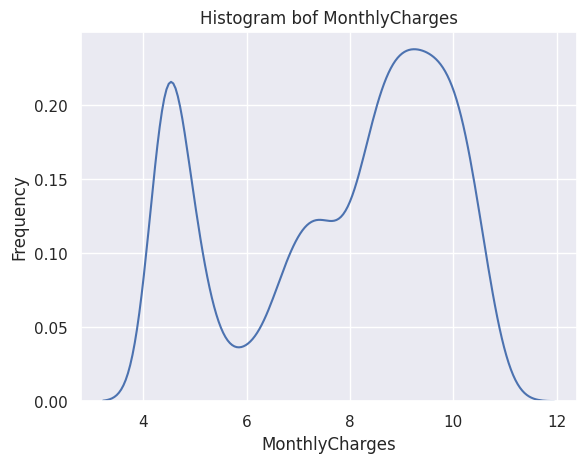

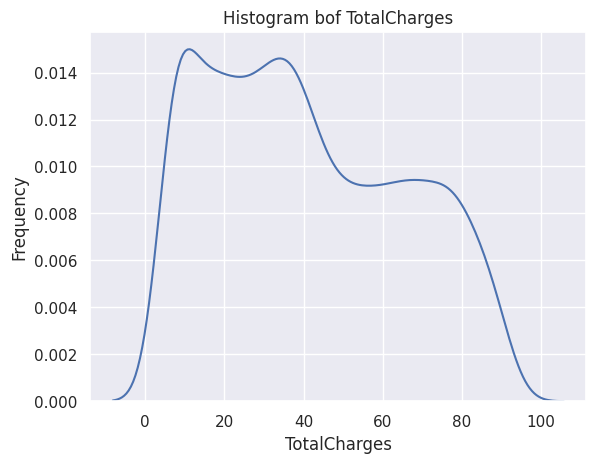

In [ ]:
for feature in continuous_features:
  dataset = df.copy()
  if 0 in dataset[feature].unique():
      print(f"Skipping {feature} because it contains zero values.")
  else:

      sns.kdeplot(data = dataset, x = np.sqrt(dataset[feature]))
      plt.title(f"Histogram bof {feature}")
      plt.xlabel(feature)
      plt.ylabel("Frequency")
      plt.show()

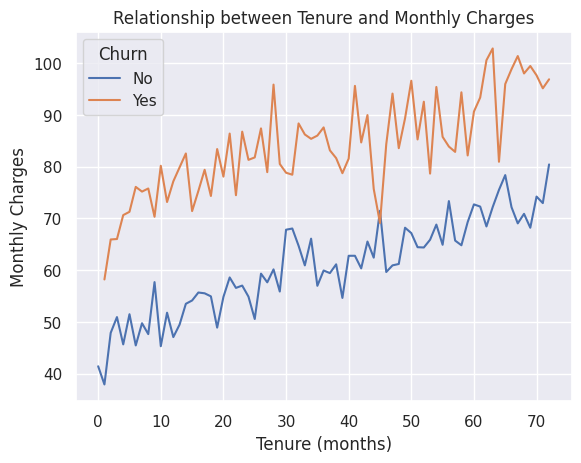

In [ ]:
tenure_groups = df.groupby(['tenure', 'Churn'])['MonthlyCharges'].mean().reset_index()

# Create a line plot
sns.lineplot(x='tenure', y='MonthlyCharges', data=tenure_groups, hue = 'Churn')
plt.title('Relationship between Tenure and Monthly Charges')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges')
plt.show()

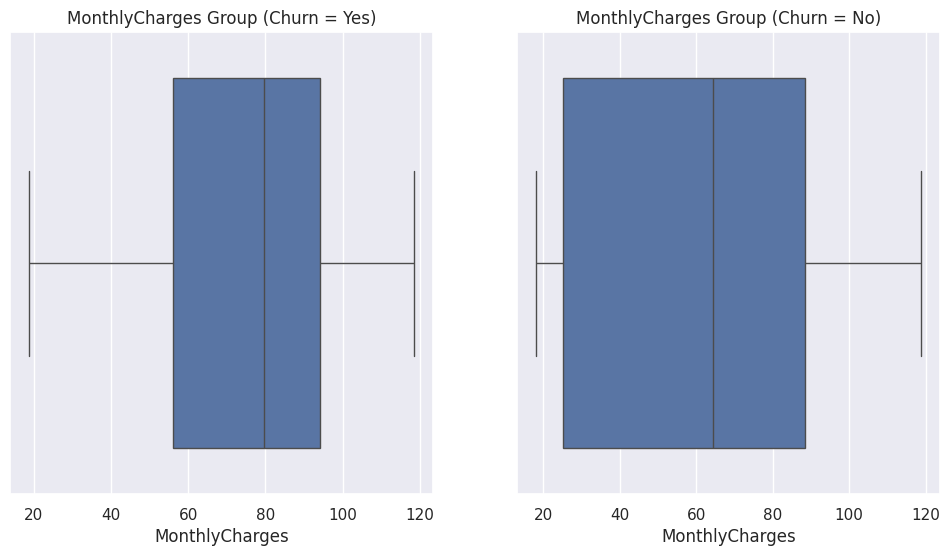

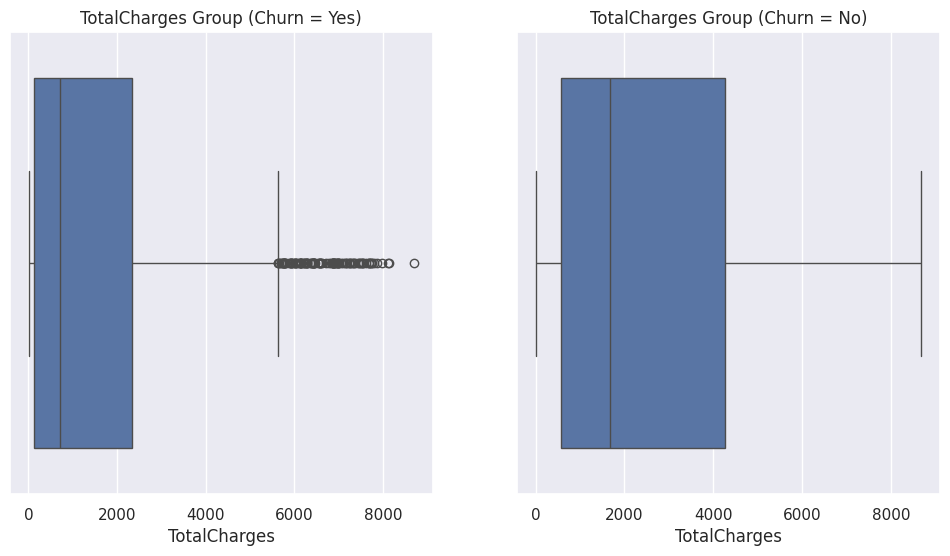

In [ ]:
for feature in continuous_features:
  dataset = df.copy()
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

  sns.boxplot(x=feature, data=dataset[dataset['Churn'] == 'Yes'], ax=ax1)
  ax1.set_title(f'{feature} Group (Churn = Yes)')
  ax1.set_xlabel(feature)

  sns.boxplot(x=feature, data=dataset[dataset['Churn'] == 'No'],ax=ax2)
  ax2.set_title(f'{feature} Group (Churn = No)')
  ax2.set_xlabel(feature)
  plt.show()

In [ ]:
df[continuous_features].describe().T

,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


#Handling missing values


In [ ]:
null_rows = df[df.isnull().any(axis=1)]
null_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
print(f"The percentage of null rows is {len(null_rows) / df.shape[0] * 100:.2f}%")

The percentage of null rows is 0.16%


In [ ]:
churn_no_df = df.loc[df['Churn'] == 'No']
print(f"The percentage of null rows is {len(null_rows) / len(churn_no_df) * 100:.2f}%")


The percentage of null rows is 0.21%


In [ ]:
null_group = null_rows.groupby('Churn').size()
null_group

,0
Churn,
No,11


In [ ]:
medians = df.groupby('Churn')['TotalCharges'].median()
medians

,TotalCharges
Churn,
No,1683.60
Yes,703.55


In [ ]:
# Calculate medians for each churn group
med_churn_yes = df[df['Churn'] == 'Yes']['TotalCharges'].median()
med_churn_no = df[df['Churn'] == 'No']['TotalCharges'].median()

# Create a dictionary to map churn values to medians
med_churn_dict = {'Yes': med_churn_yes, 'No': med_churn_no}

# Fill missing values in TotalCharges column
df['TotalCharges'].fillna(df['Churn'].map(med_churn_dict), inplace=True)

# Create a new dataframe df1 with the desired columns
#df1 = df[['customerID', 'TotalCharges']]

In [ ]:
df.iloc[488]

,488
customerID,4472-LVYGI
gender,Female
SeniorCitizen,0
Partner,Yes
Dependents,Yes
tenure,0
PhoneService,No
MultipleLines,No phone service
InternetService,DSL
OnlineSecurity,Yes


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
print(df.shape)

(7043, 21)


In [ ]:
for feature in df.columns:
    print(f"{feature}: {df[feature].unique()}")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)

In [ ]:
main_feature = ['PhoneService', 'InternetService']
main_encoding = pd.get_dummies(df, columns=main_feature)

In [ ]:
main_encoding.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PhoneService_No,PhoneService_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,Female,0,Yes,No,1,No phone service,No,Yes,No,...,Yes,Electronic check,29.85,29.85,No,True,False,True,False,False
1,5575-GNVDE,Male,0,No,No,34,No,Yes,No,Yes,...,No,Mailed check,56.95,1889.50,No,False,True,True,False,False
2,3668-QPYBK,Male,0,No,No,2,No,Yes,Yes,No,...,Yes,Mailed check,53.85,108.15,Yes,False,True,True,False,False
3,7795-CFOCW,Male,0,No,No,45,No phone service,Yes,No,Yes,...,No,Bank transfer (automatic),42.30,1840.75,No,True,False,True,False,False
4,9237-HQITU,Female,0,No,No,2,No,No,No,No,...,Yes,Electronic check,70.70,151.65,Yes,False,True,False,True,False


In [ ]:
main_encoding['MultipleLines_No_Phone_Service'] = (df['PhoneService'] == 'No') & (df['MultipleLines'] == 'No phone service')
main_encoding['MultipleLines_No'] = (df['PhoneService'] == 'Yes') & (df['MultipleLines'] == 'No')
main_encoding['MultipleLines_Yes'] = (df['PhoneService'] == 'Yes') & (df['MultipleLines'] == 'Yes')


In [ ]:
internet_service_conditions = df['InternetService'].isin(['DSL', 'Fiber optic'])
for feature in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    main_encoding[f'{feature}_No_Internet_Service'] = (df['InternetService'] == 'No') & (df[feature] == 'No internet service')
    main_encoding[f'{feature}_No'] = internet_service_conditions & (df[feature] == 'No')
    main_encoding[f'{feature}_Yes'] = internet_service_conditions & (df[feature] == 'Yes')

In [ ]:
print(main_encoding.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'PhoneService_No', 'PhoneService_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_No_Phone_Service',
       'MultipleLines_No', 'MultipleLines_Yes',
       'OnlineSecurity_No_Internet_Service', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No_Internet_Service',
       'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No_Internet_Service', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No_Internet_Service',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No_Internet_Service',
       'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No_Int

In [ ]:
#final_df = main_encoding.drop(columns=['PhoneService', 'InternetService'] + list(dependencies.keys()))
main_encoding.drop(['MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], axis = 1, inplace = True)

In [ ]:
print(main_encoding.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'PhoneService_No',
       'PhoneService_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No_Phone_Service', 'MultipleLines_No',
       'MultipleLines_Yes', 'OnlineSecurity_No_Internet_Service',
       'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No_Internet_Service', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No_Internet_Service',
       'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No_Internet_Service', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No_Internet_Service', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No_Internet_Service', 'StreamingMovies_No',
       'StreamingMovies_Yes'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
yesNo_feature = ['gender', 'Partner', 'Dependents', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [ ]:
for feature in yesNo_feature:
   main_encoding[f'{feature}_encoded'] = le.fit_transform(main_encoding[feature])

In [ ]:
print(main_encoding.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'PhoneService_No',
       'PhoneService_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No_Phone_Service', 'MultipleLines_No',
       'MultipleLines_Yes', 'OnlineSecurity_No_Internet_Service',
       'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No_Internet_Service', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No_Internet_Service',
       'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No_Internet_Service', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No_Internet_Service', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No_Internet_Service', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'gender_encoded', 'Partner_encoded',
       'Dependents_encoded', 

In [ ]:
main_encoding.drop(yesNo_feature, axis = 1, inplace = True)

In [ ]:
print(main_encoding.columns)

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'PhoneService_No', 'PhoneService_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_No_Phone_Service',
       'MultipleLines_No', 'MultipleLines_Yes',
       'OnlineSecurity_No_Internet_Service', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No_Internet_Service',
       'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No_Internet_Service', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No_Internet_Service',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No_Internet_Service',
       'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No_Internet_Service', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'gender_encoded', 'Partner_encoded',
       'Dependents_encoded', 'Contract_encoded', 'PaperlessBilling_encoded',
       'PaymentMethod_encoded'],
      dtyp

In [ ]:
main_encoding.shape

(7043, 38)

In [ ]:
main_encoding['Churn'] = main_encoding['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
mean_churn_rate = main_encoding.groupby('tenure')['Churn'].mean()
mapping = mean_churn_rate.to_dict()
main_encoding['tenure_encoded'] = main_encoding['tenure'].map(mapping)

In [ ]:
main_encoding = main_encoding.drop('tenure', axis= 1)

In [ ]:
for feature in main_encoding.columns:
    print(f"{feature}: {main_encoding[feature].unique()}")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
SeniorCitizen: [0 1]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
PhoneService_No: [ True False]
PhoneService_Yes: [False  True]
InternetService_DSL: [ True False]
InternetService_Fiber optic: [False  True]
InternetService_No: [False  True]
MultipleLines_No_Phone_Service: [ True False]
MultipleLines_No: [False  True]
MultipleLines_Yes: [False  True]
OnlineSecurity_No_Internet_Service: [False  True]
OnlineSecurity_No: [ True False]
OnlineSecurity_Yes: [False  True]
OnlineBackup_No_Internet_Service: [False  True]
OnlineBackup_No: [False  True]
OnlineBackup_Yes: [ True False]
DeviceProtection_No_Internet_Service: [False  True]
DeviceProtection_No: [ True False]
DeviceProtection_Yes: [False  True]
TechSupport_No_Internet_Service: [False  True]
TechSupport_No: [ True False]
TechSupport_Yes: [False  True

In [ ]:
main_encoding.shape

(7043, 38)

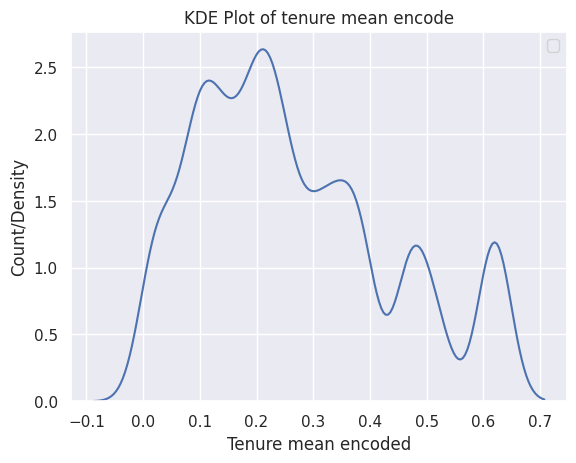

In [ ]:
sns.kdeplot(data=main_encoding['tenure_encoded'])
plt.title('KDE Plot of tenure mean encode')
plt.xlabel('Tenure mean encoded')
plt.ylabel('Count/Density')
plt.legend()
plt.show()

<Axes: xlabel='tenure_encoded'>

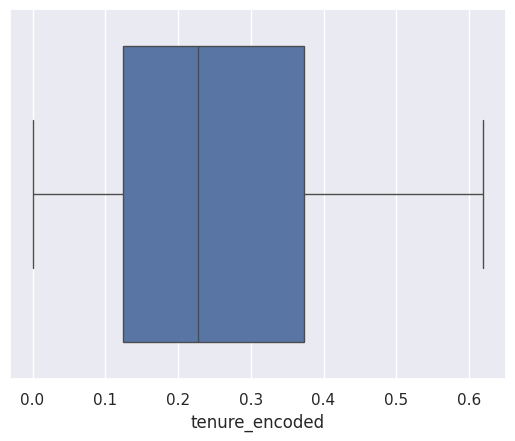

In [ ]:
sns.boxplot(x = 'tenure_encoded', data = main_encoding)

#Handling imbalanced data


In [ ]:
group = main_encoding.groupby('Churn').size()
group

,0
Churn,
0,5174
1,1869


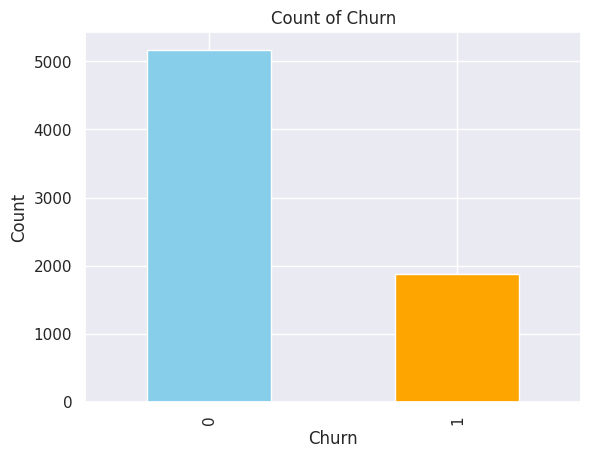

In [ ]:
group.plot(kind= 'bar', color = ['skyblue', 'orange'])
plt.title('Count of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [ ]:
main_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customerID                            7043 non-null   object 
 1   SeniorCitizen                         7043 non-null   int64  
 2   MonthlyCharges                        7043 non-null   float64
 3   TotalCharges                          7043 non-null   float64
 4   Churn                                 7043 non-null   int64  
 5   PhoneService_No                       7043 non-null   bool   
 6   PhoneService_Yes                      7043 non-null   bool   
 7   InternetService_DSL                   7043 non-null   bool   
 8   InternetService_Fiber optic           7043 non-null   bool   
 9   InternetService_No                    7043 non-null   bool   
 10  MultipleLines_No_Phone_Service        7043 non-null   bool   
 11  MultipleLines_No 

In [ ]:
main_encoding = pd.read_csv('/content/encoded.csv')

In [ ]:
main_encoding.shape

(7043, 38)

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score,  confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve

In [ ]:
X = main_encoding.drop(['customerID', 'Churn'], axis = 1)
y = main_encoding['Churn']

In [ ]:
print(X.shape)
print(y.shape)

(7043, 36)
(7043,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5282, 36)
(5282,)
(1761, 36)
(1761,)


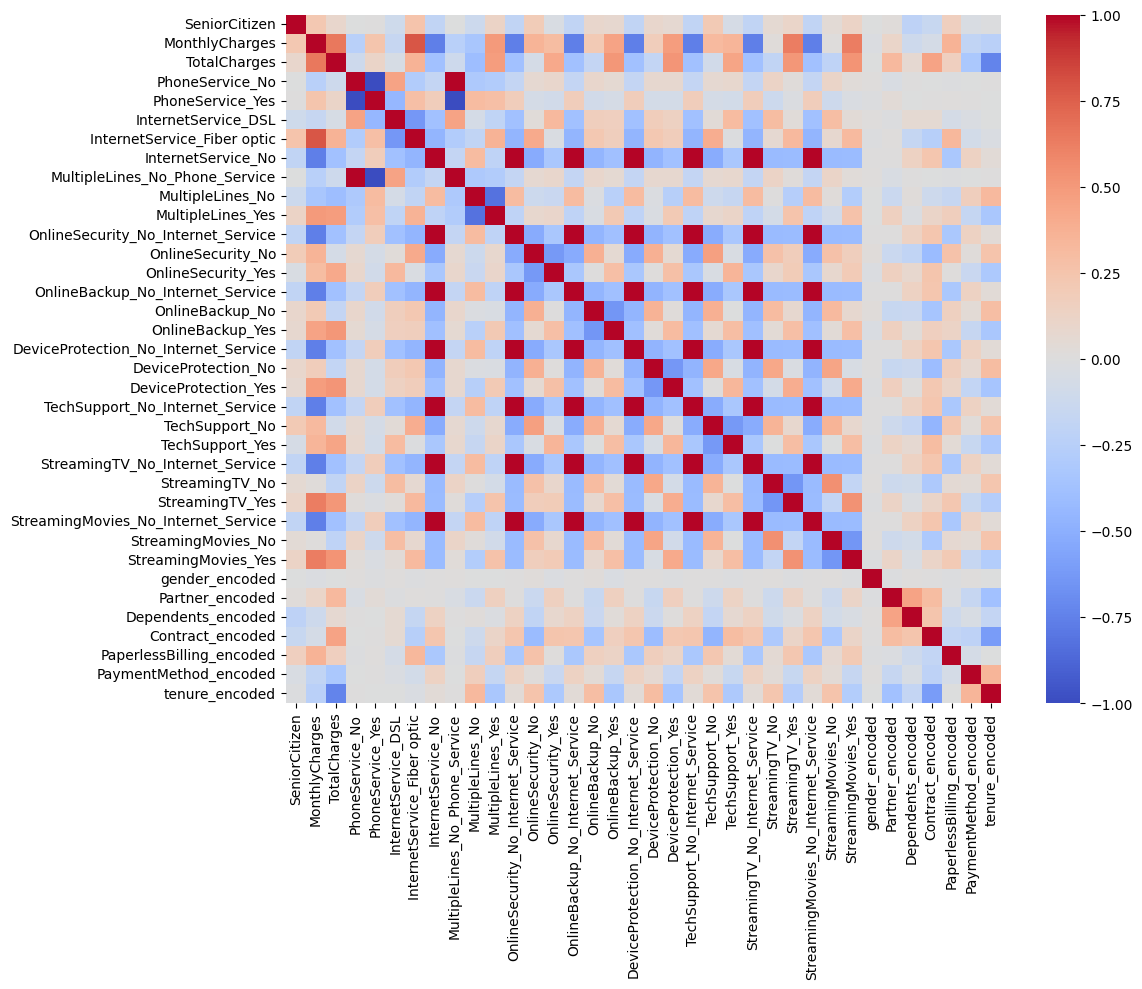

In [ ]:
corr_matrix = X_train.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.tight_layout()
plt.show()

#Scaling

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[0.00000000e+00, 7.02541106e-02, 7.50057697e-04, ...,
        1.00000000e+00, 6.66666667e-01, 1.00000000e+00],
       [0.00000000e+00, 5.67015446e-01, 5.84121856e-02, ...,
        1.00000000e+00, 6.66666667e-01, 6.28023303e-01],
       [0.00000000e+00, 1.79372197e-02, 7.69674590e-03, ...,
        1.00000000e+00, 0.00000000e+00, 7.60750598e-01],
       ...,
       [0.00000000e+00, 2.88988540e-02, 3.31467805e-02, ...,
        1.00000000e+00, 6.66666667e-01, 5.23931624e-01],
       [1.00000000e+00, 8.09167912e-01, 1.36320102e-01, ...,
        1.00000000e+00, 6.66666667e-01, 5.23931624e-01],
       [0.00000000e+00, 1.54459392e-02, 5.06000462e-02, ...,
        0.00000000e+00, 3.33333333e-01, 3.06295803e-01]])

In [ ]:
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train)

In [ ]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(7736, 36)
(7736,)


In [ ]:
print("Resampled class distribution:\n", pd.Series(y_train_resampled).value_counts())

Resampled class distribution:
 Churn
0    3892
1    3844
Name: count, dtype: int64


In [ ]:
group_resampled = y_train_resampled.value_counts()

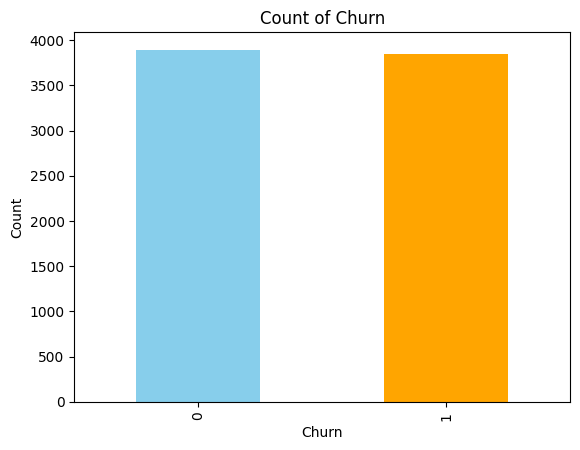

In [ ]:
group_resampled.plot(kind= 'bar', color = ['skyblue', 'orange'])
plt.title('Count of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

plt.show()

#Feature selection



In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.95) + 1
print(n_components)

14


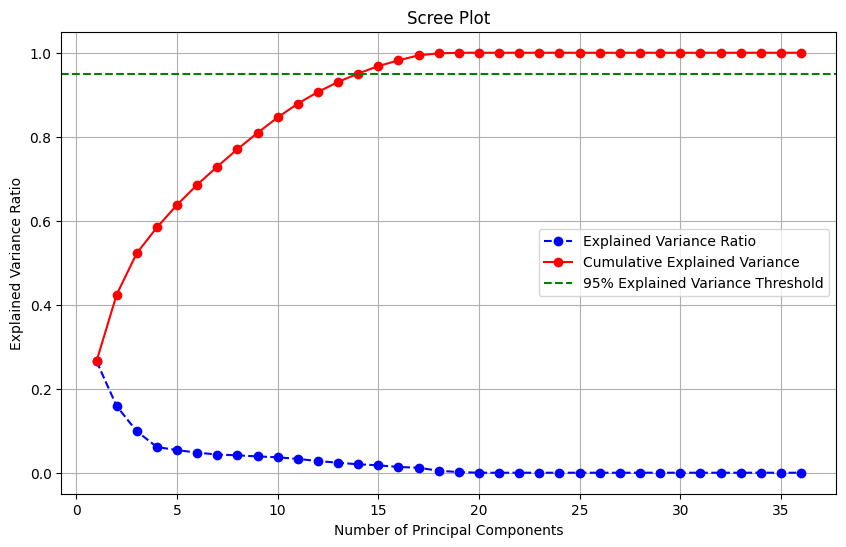

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--', color='b', label='Explained Variance Ratio')
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='r', label='Cumulative Explained Variance')

plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Explained Variance Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
loadings = pca.components_.T  # Transpose to get features as rows
feature_names = X.columns

# Create a DataFrame for the loadings
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=feature_names)

# Show the features contributing most to the first few principal components
print("Principal Component Loadings (first few components):")
print(loadings_df.head())

Principal Component Loadings (first few components):
                       PC1       PC2       PC3       PC4       PC5       PC6  \
SeniorCitizen    -0.066620  0.011888 -0.095180  0.013753  0.066496 -0.043458   
MonthlyCharges   -0.170320  0.143823 -0.105607  0.029446 -0.127093 -0.002325   
TotalCharges     -0.061477  0.192853  0.027018  0.069337 -0.040999  0.010351   
PhoneService_No  -0.028162 -0.042928  0.196067 -0.143939  0.291404 -0.053061   
PhoneService_Yes  0.028162  0.042928 -0.196067  0.143939 -0.291404  0.053061   

                       PC7       PC8       PC9      PC10      PC11      PC12  \
SeniorCitizen     0.037831 -0.041690  0.077528 -0.003220 -0.026839 -0.113327   
MonthlyCharges   -0.014823 -0.025580  0.004215 -0.017637 -0.007282  0.033920   
TotalCharges     -0.001149 -0.008299 -0.000033 -0.021122 -0.003706  0.014645   
PhoneService_No   0.009512  0.058172  0.046979  0.027000  0.036722 -0.116441   
PhoneService_Yes -0.009512 -0.058172 -0.046979 -0.027000 -0.036722

#random forest

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions and evaluate
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1282
           1       0.60      0.59      0.60       479

    accuracy                           0.78      1761
   macro avg       0.73      0.72      0.72      1761
weighted avg       0.78      0.78      0.78      1761



In [ ]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 0.7825


In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 4, 6],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [ ]:
best_model = grid_search.best_estimator_
best_model
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 6, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 0.7944712530211845


In [ ]:
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.8595854272584265


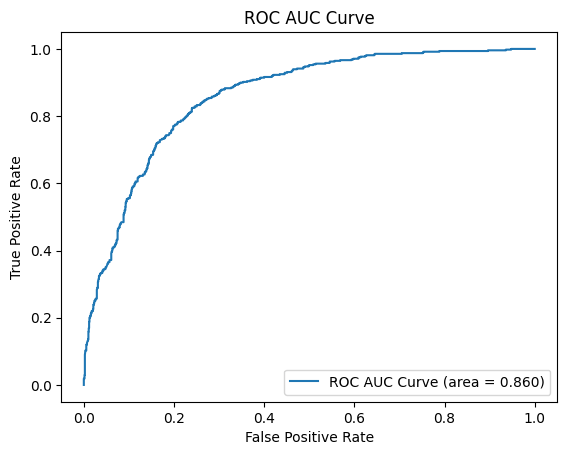

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="ROC AUC Curve (area = {:.3f})".format(roc_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve")
plt.legend()
plt.show()

In [ ]:
y_pred = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

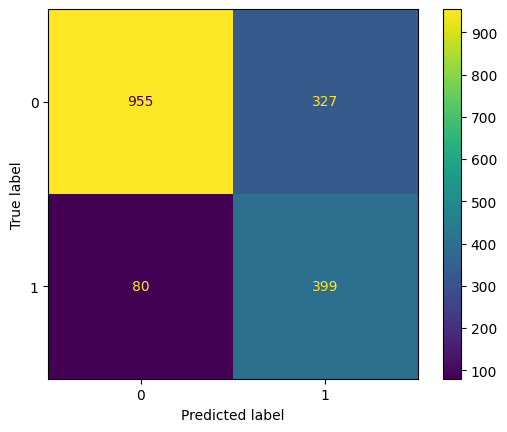

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=grid_search.classes_)
disp.plot()
plt.show()

In [ ]:
train_pred = best_model.predict(X_train_resampled)
test_pred = best_model.predict(X_test_scaled)
train_accuracy = accuracy_score(y_train_resampled, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

In [ ]:
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8153
Test Accuracy: 0.7689


#Logistic Regression

In [ ]:
#logistic
from sklearn.linear_model import LogisticRegression


log_model = LogisticRegression()
log_model.fit(X_train_pca, y_train_resampled)

LogisticRegression()

In [ ]:
y_pred_log = log_model.predict(X_test_pca)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1282
           1       0.51      0.80      0.62       479

    accuracy                           0.74      1761
   macro avg       0.71      0.76      0.71      1761
weighted avg       0.80      0.74      0.75      1761



In [ ]:
accuracy = accuracy_score(y_test, y_pred_log)

print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 0.7382


In [ ]:
param_grid_log = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs']
}

In [ ]:
grid_search_log = GridSearchCV(log_model, param_grid_log, cv=5, scoring='accuracy')
grid_search_log.fit(X_train_pca, y_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [ ]:
best_model_log = grid_search_log.best_estimator_
best_model_log
print("Best Parameters:", grid_search_log.best_params_)
print("Best Score:", grid_search_log.best_score_)

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.7138021577146064


In [ ]:
y_pred_proba_log = best_model_log.predict_proba(X_test_pca)[:, 1]

In [ ]:
roc_auc_log = roc_auc_score(y_test, y_pred_proba_log)
print("ROC AUC Score:", roc_auc_log)

ROC AUC Score: 0.8285095704454484


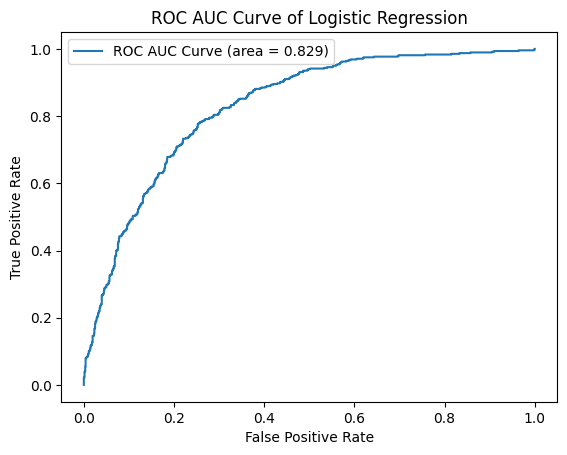

In [ ]:
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_proba_log)
plt.plot(fpr_log, tpr_log, label="ROC AUC Curve (area = {:.3f})".format(roc_auc_log))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve of Logistic Regression")
plt.legend()
plt.show()

In [ ]:
y_pred_log = best_model_log.predict(X_test_pca)
cm_log = confusion_matrix(y_test, y_pred_log)

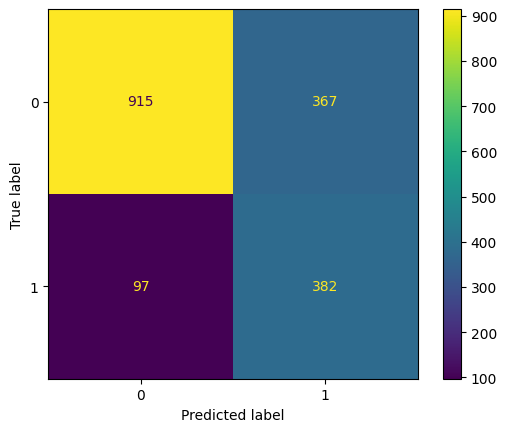

In [ ]:
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log,
                              display_labels=grid_search_log.classes_)
disp_log.plot()
plt.show()

In [ ]:
train_pred_log = best_model_log.predict(X_train_pca)
test_pred_log = best_model_log.predict(X_test_pca)
train_accuracy_log = accuracy_score(y_train_resampled, train_pred_log)
test_accuracy_log = accuracy_score(y_test, test_pred_log)

In [ ]:
print(f"Training Accuracy: {train_accuracy_log:.4f}")
print(f"Test Accuracy: {test_accuracy_log:.4f}")

Training Accuracy: 0.7165
Test Accuracy: 0.7365


#XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic')
xgb_model.fit(X_train_pca, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test_pca)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1282
           1       0.50      0.62      0.55       479

    accuracy                           0.73      1761
   macro avg       0.67      0.69      0.68      1761
weighted avg       0.75      0.73      0.73      1761



In [ ]:
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.5, 0.9],
    'n_estimators': [50, 100, 200],
    #'gamma': [0, 0.1, 0.5],
    #'subsample': [0.5, 0.8, 1],
    #'colsample_bytree': [0.5, 0.8, 1],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

In [ ]:
grid_search_xgb = GridSearchCV(xgb_model, param_grid, cv=5, scoring='f1_macro')
grid_search_xgb.fit(X_train_pca, y_train_resampled)

NameError: name 'GridSearchCV' is not defined

In [ ]:
best_model = grid_search.best_estimator_
best_model
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

In [ ]:
train_pred = best_model.predict(X_train_pca)
test_pred_ = best_model.predict(X_test_pca)
train_accuracy = accuracy_score(y_train_resampled, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

In [ ]:
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

In [ ]:
y_pred_proba = best_model.predict_proba(X_test_pca)[:, 1]

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_knn)
plt.plot(fpr, tpr, label="ROC AUC Curve (area = {:.3f})".format(roc_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve of KNN")
plt.legend()
plt.show()

In [ ]:
cm= confusion_matrix(y_test, y_pred_knn)
disp= ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=grid_search.classes_)
disp.plot()
plt.show()

In [ ]:
dump(best_model, 'model_xgb.joblib')

#FNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
fnn_model = Sequential()
fnn_model.add(Dense(256, input_dim = X_train_pca.shape[1]))
fnn_model.add(BatchNormalization())
fnn_model.add(Dropout(0.3))

fnn_model.add(Dense(128, activation = 'relu'))
fnn_model.add(BatchNormalization())
fnn_model.add(Dropout(0.2))

fnn_model.add(Dense(32, activation = 'relu'))
fnn_model.add(BatchNormalization())
fnn_model.add(Dropout(0.2))

fnn_model.add(Dense(1, activation='sigmoid'))


fnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
fnn_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 256)                 │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,561 (166.25 KB)

 Trainable params: 41,729 (163.00 KB)

 Non-trainable params: 832 (3.25 KB)

In [ ]:
X_train_fnn, X_val_fnn, y_train_fnn, y_val_fnn = train_test_split(X_train_pca, y_train_resampled, test_size=0.2, random_state=42)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)

In [ ]:
history = fnn_model.fit(X_train_pca, y_train_resampled, epochs=50, batch_size=32, validation_data=(X_val_fnn, y_val_fnn), callbacks=[early_stopping])

Epoch 1/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6556 - loss: 0.6944 - val_accuracy: 0.6731 - val_loss: 0.6001
Epoch 2/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6962 - loss: 0.5896 - val_accuracy: 0.7280 - val_loss: 0.5375
Epoch 3/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7232 - loss: 0.5432 - val_accuracy: 0.7319 - val_loss: 0.5264
Epoch 4/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7218 - loss: 0.5501 - val_accuracy: 0.7461 - val_loss: 0.5142
Epoch 5/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7358 - loss: 0.5364 - val_accuracy: 0.7513 - val_loss: 0.5075
Epoch 6/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7381 - loss: 0.5296 - val_accuracy: 0.7487 - val_loss: 0.5053
Epoch 7/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7309 - loss: 0.5279 - val_accuracy: 0.7629 - val_loss: 0.4973
Epoch 8/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7302 - loss: 0.5265 - val_accuracy: 0.

In [ ]:
test_loss_fnn, test_acc_fnn = fnn_model.evaluate(X_test_pca, y_test)
print(f'Test accuracy: {test_acc_fnn:.2f}')

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7338 - loss: 0.5813
Test accuracy: 0.72


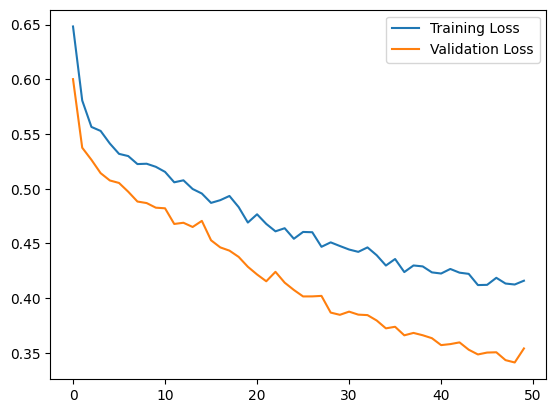

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

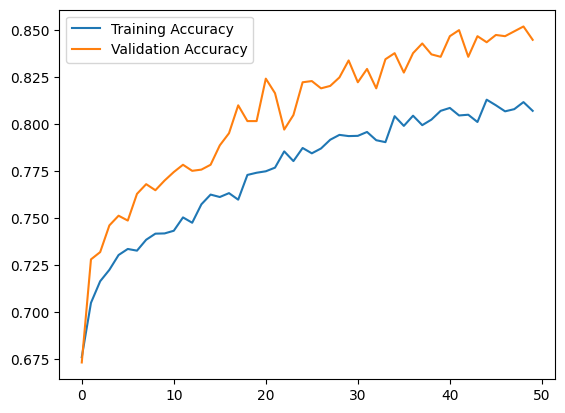

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()